# ML model

Loaded data: (200, 11)
LinearRegression → RMSE: 0.0003, MAE: 0.0134, R²: 0.9981
Ridge → RMSE: 0.0070, MAE: 0.0552, R²: 0.9599
RandomForest → RMSE: 0.0100, MAE: 0.0635, R²: 0.9427

Model performance summary:
              Model      RMSE       MAE        R2
0  LinearRegression  0.000326  0.013443  0.998143
1             Ridge  0.007038  0.055182  0.959858
2      RandomForest  0.010045  0.063493  0.942709

✅ Best model: LinearRegression
📁 Saved model to: best_model_LinearRegression.pkl
📁 Metrics summary saved to: model_metrics_summary.csv


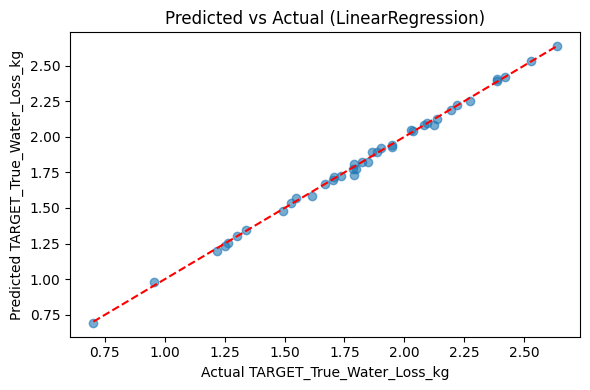

In [8]:
# hydration_water_loss_model.py

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===== Load Data =====
DATA_PATH = "formatted_hydration_data.csv"  # update path if needed
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

# ===== Drop column and select features =====
drop_col = "Final_Weight_kg"
if drop_col in df.columns:
    df = df.drop(columns=[drop_col])

target = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

# Basic validation
missing_feats = [f for f in features if f not in df.columns]
if missing_feats:
    raise ValueError(f"The following specified features are missing in the dataset: {missing_feats}")
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset.")

X = df[features]
y = df[target].astype(float)

# ===== Train/Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Preprocessing =====
num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X.select_dtypes(include=["object", "category"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

# ===== Models =====
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []
trained = {}

for name, model in models.items():
    pipe = Pipeline([("preprocess", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, rmse, mae, r2))
    trained[name] = pipe
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# ===== Evaluate =====
res_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
print("\nModel performance summary:")
print(res_df)

# ===== Save best model =====
best_model_name = res_df.iloc[0]["Model"]
best_model = trained[best_model_name]
model_path = f"best_model_{best_model_name}.pkl"
metrics_path = "model_metrics_summary.csv"

with open(model_path, "wb") as f:
    pickle.dump(best_model, f)
res_df.to_csv(metrics_path, index=False)

print(f"\n✅ Best model: {best_model_name}")
print(f"📁 Saved model to: {model_path}")
print(f"📁 Metrics summary saved to: {metrics_path}")

# ===== Plot predicted vs actual =====
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual " + target)
plt.ylabel("Predicted " + target)
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.show()


## Advanced models

Loaded data: (200, 11)
LinearRegression → RMSE: 0.0003, MAE: 0.0134, R²: 0.9981
Ridge → RMSE: 0.0070, MAE: 0.0552, R²: 0.9599
RandomForest → RMSE: 0.0098, MAE: 0.0637, R²: 0.9441
MLPRegressor → RMSE: 0.0303, MAE: 0.1400, R²: 0.8271

📊 Model Performance Summary:
              Model      RMSE       MAE        R2
0  LinearRegression  0.000326  0.013443  0.998143
1             Ridge  0.007038  0.055182  0.959858
4    PyTorch_DeepNN  0.009025  0.071012  0.948528
2      RandomForest  0.009802  0.063718  0.944093
3      MLPRegressor  0.030310  0.139993  0.827133
✅ Metrics summary saved: model_metrics_summary.csv


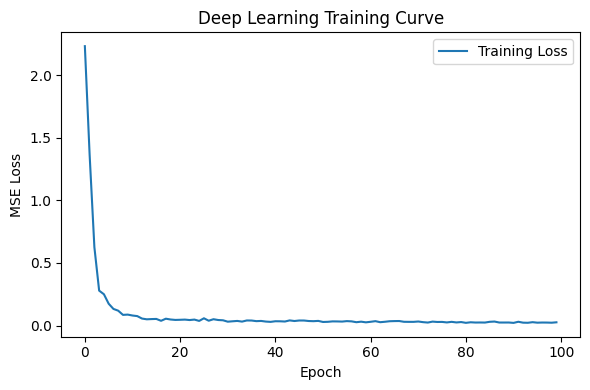

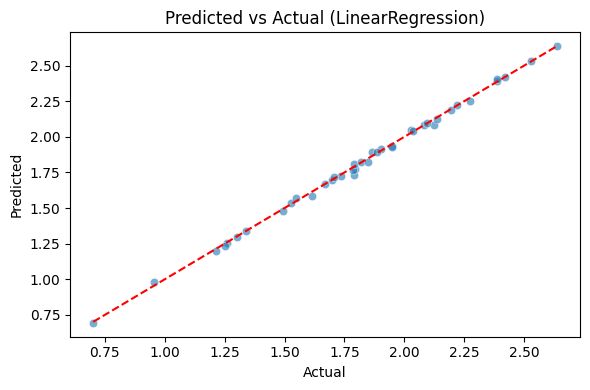

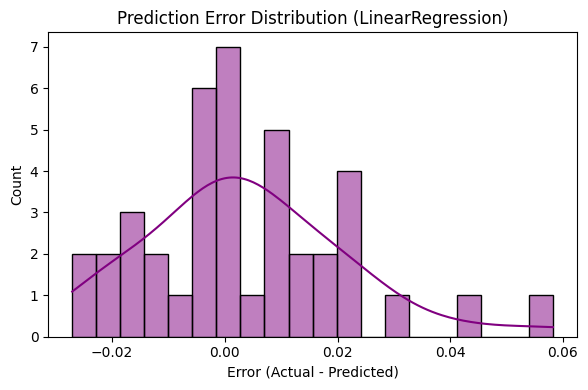

/tmp/ipython-input-3416956288.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")


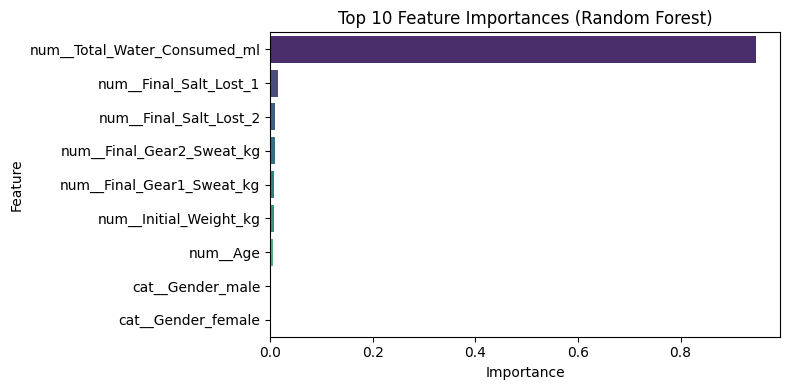


🏆 Best Performing Model: LinearRegression


In [11]:
# hydration_water_loss_model_v2.py

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# ===================================================
# 1️⃣ Load Data
# ===================================================
DATA_PATH = "formatted_hydration_data.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

# Drop unwanted column
if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

target = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

# Validation
if not all(f in df.columns for f in features):
    raise ValueError("Missing required feature columns.")
if target not in df.columns:
    raise ValueError(f"Target '{target}' not found.")

X = df[features]
y = df[target].astype(float)

# ===================================================
# 2️⃣ Split
# ===================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===================================================
# 3️⃣ Preprocessing
# ===================================================
num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X.select_dtypes(include=["object", "category"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

# ===================================================
# 4️⃣ Classical Models
# ===================================================
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

results = []
trained = {}

for name, model in models.items():
    pipe = Pipeline([("preprocess", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, rmse, mae, r2))
    trained[name] = pipe
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# ===================================================
# 5️⃣ Deep Learning (PyTorch)
# ===================================================
class FeedForwardNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Preprocess numeric data for PyTorch
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)
input_dim = X_train_t.shape[1]

X_train_t = torch.tensor(X_train_t, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test_t, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_data = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

model = FeedForwardNet(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))

model.eval()
with torch.no_grad():
    y_pred_dl = model(X_test_t).numpy().flatten()

rmse_dl = mean_squared_error(y_test, y_pred_dl)
mae_dl = mean_absolute_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)

results.append(("PyTorch_DeepNN", rmse_dl, mae_dl, r2_dl))
trained["PyTorch_DeepNN"] = model

# ===================================================
# 6️⃣ Summary
# ===================================================
res_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
print("\n📊 Model Performance Summary:")
print(res_df)

best_model_name = res_df.iloc[0]["Model"]
metrics_path = "model_metrics_summary.csv"
res_df.to_csv(metrics_path, index=False)
print(f"✅ Metrics summary saved: {metrics_path}")

# ===================================================
# 7️⃣ Visualization Section
# ===================================================

# --- Loss curve (for DL)
plt.figure(figsize=(6,4))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Deep Learning Training Curve")
plt.legend()
plt.tight_layout()
plt.show()

# --- Predicted vs Actual
best_model = trained[best_model_name]
if "PyTorch" in best_model_name:
    y_pred_best = y_pred_dl
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.show()

# --- Error distribution
errors = y_test - y_pred_best
plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True, color='purple', bins=20)
plt.title(f"Prediction Error Distribution ({best_model_name})")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()

# --- Feature importance for tree model
if "RandomForest" in trained:
    rf_model = trained["RandomForest"].named_steps["model"]
    feat_names = preprocessor.get_feature_names_out()
    importances = rf_model.feature_importances_
    imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values("Importance", ascending=False).head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")
    plt.title("Top 10 Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()

print(f"\n🏆 Best Performing Model: {best_model_name}")


Loaded data: (200, 11)

🔹 Training RNN model...
RNN → RMSE: 0.0097, MAE: 0.0687, R²: 0.9449

🔹 Training GRU model...
GRU → RMSE: 0.0106, MAE: 0.0798, R²: 0.9394

🔹 Training LSTM model...
LSTM → RMSE: 0.0100, MAE: 0.0764, R²: 0.9428

🔹 Training Attention model...
Attention → RMSE: 0.0223, MAE: 0.1203, R²: 0.8730

📊 Performance Summary:
          Model      RMSE       MAE        R2
0           RNN  0.009654  0.068708  0.944939
4  RandomForest  0.009835  0.064289  0.943905
2          LSTM  0.010034  0.076380  0.942774
1           GRU  0.010626  0.079776  0.939396
3     Attention  0.022261  0.120315  0.873040

🏆 Best Model: RNN


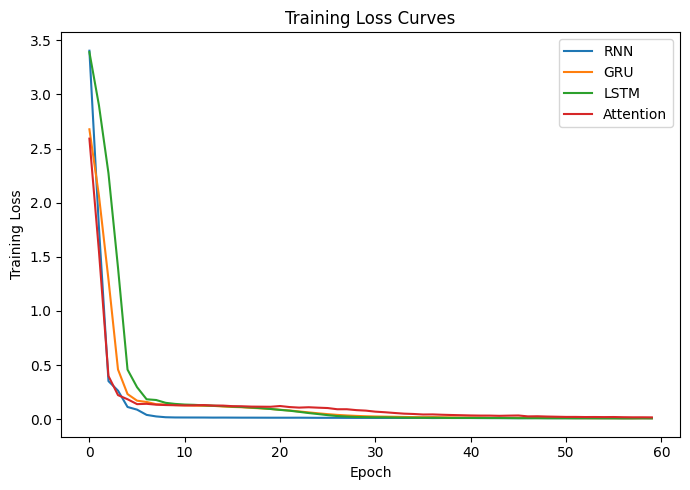

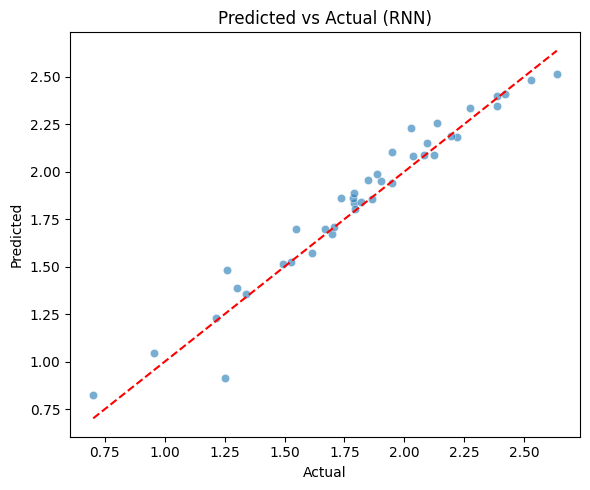

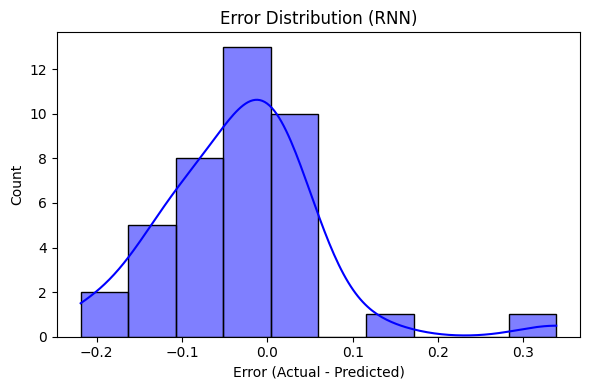

/tmp/ipython-input-1563831170.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")


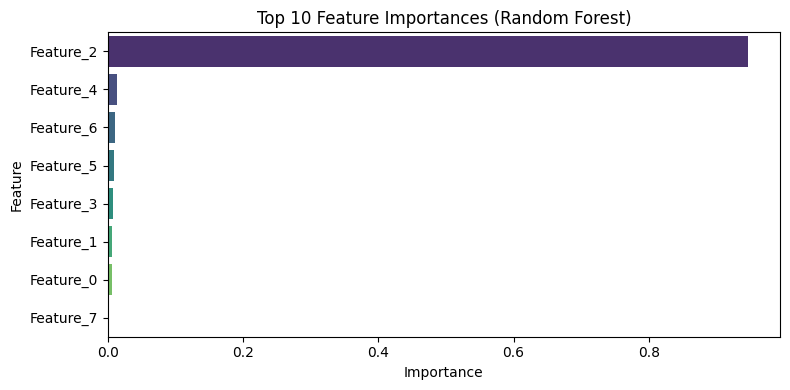

In [14]:
# hydration_water_loss_deep_v3.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===================================================
# 1️⃣ Load and Prepare Data
# ===================================================
DATA_PATH = "formatted_hydration_data.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

target = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

X = df[features]
y = df[target].astype(float)

num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X.select_dtypes(include=["object", "category"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

input_dim = X_train_t.shape[1]
seq_len = 4  # number of timesteps to simulate sequence length
# reshape [samples, features] → [samples, seq_len, features/seq_len]
# (pad or trim to make it divisible by seq_len)
feat_per_step = input_dim // seq_len
X_train_seq = X_train_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)
X_test_seq = X_test_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=16, shuffle=True)

# ===================================================
# 2️⃣ Define Models
# ===================================================
class RNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        return self.fc(h[-1])

class GRURegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.gru(x)
        return self.fc(h[-1])

class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class AttentionRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attn = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=4, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        attn_out, _ = self.attn(out, out, out)
        pooled = attn_out.mean(dim=1)
        return self.fc(pooled)

# ===================================================
# 3️⃣ Training Function
# ===================================================
def train_model(model, loader, epochs=60, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        model.train()
        for xb, yb in loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
    return losses

# ===================================================
# 4️⃣ Train All Models
# ===================================================
models = {
    "RNN": RNNRegressor(feat_per_step),
    "GRU": GRURegressor(feat_per_step),
    "LSTM": LSTMRegressor(feat_per_step),
    "Attention": AttentionRegressor(feat_per_step)
}

results = []
trained = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} model...")
    losses = train_model(model, train_loader)
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_t).numpy().flatten()
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, mae, r2))
    trained[name] = (model, losses, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Add baseline (RandomForest)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_t.reshape(X_train_t.shape[0], -1), y_train)
y_pred_rf = rf.predict(X_test_t.reshape(X_test_t.shape[0], -1))
results.append(("RandomForest",
                mean_squared_error(y_test, y_pred_rf),
                mean_absolute_error(y_test, y_pred_rf),
                r2_score(y_test, y_pred_rf)))
trained["RandomForest"] = (rf, None, y_pred_rf)

# ===================================================
# 5️⃣ Summary + Save
# ===================================================
res_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
res_df.to_csv("deep_model_metrics.csv", index=False)
print("\n📊 Performance Summary:")
print(res_df)

best_model_name = res_df.iloc[0]["Model"]
print(f"\n🏆 Best Model: {best_model_name}")

# ===================================================
# 6️⃣ Visualization
# ===================================================

# --- Loss curves
plt.figure(figsize=(7,5))
for name, (model, losses, _) in trained.items():
    if losses is not None:
        plt.plot(losses, label=name)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.tight_layout()
plt.show()

# --- Predicted vs Actual
best_pred = trained[best_model_name][2]
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.show()

# --- Error distribution
errors = y_test - best_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True, color='blue')
plt.title(f"Error Distribution ({best_model_name})")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()

# --- Feature Importance (RandomForest only)
rf_model = trained["RandomForest"][0]
importances = rf_model.feature_importances_

# Try to get feature names if the counts match
try:
    feat_names = preprocessor.get_feature_names_out()
    if len(feat_names) != len(importances):
        raise ValueError("Length mismatch between features and importances")
    imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
except Exception:
    # Fallback: use index numbers if mismatch
    imp_df = pd.DataFrame({
        "Feature": [f"Feature_{i}" for i in range(len(importances))],
        "Importance": importances
    })

imp_df = imp_df.sort_values("Importance", ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()



## diagnostics

Loaded data: (200, 11)

===== Linear Regression Summary =====
RMSE: 0.0180, MAE: 0.0134, R²: 0.9981

Coefficients:
Gender                   :  0.0021
Age                      : -0.0011
Initial_Weight_kg        :  12.5228
Total_Water_Consumed_ml  :  0.3515
Final_Gear1_Sweat_kg     : -12.4380
Final_Salt_Lost_1        : -0.0050
Final_Gear2_Sweat_kg     :  0.0095
Final_Salt_Lost_2        :  0.0002


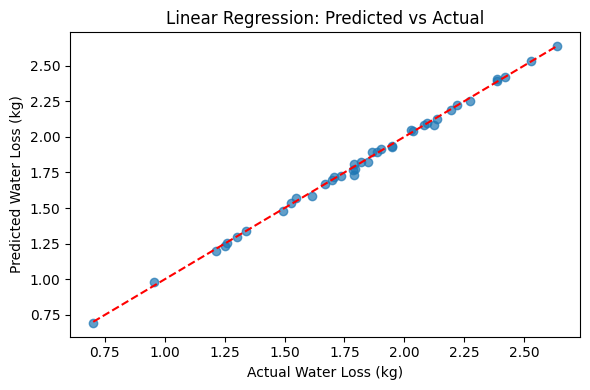

/tmp/ipython-input-689225648.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")


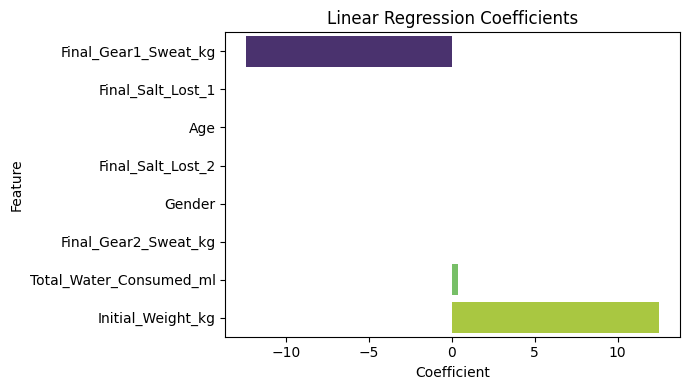

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

===== RNN Model Summary =====


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,357 (79.52 KB)

 Trainable params: 6,785 (26.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,572 (53.02 KB)

None

RMSE: 0.1354, MAE: 0.0967, R²: 0.8954


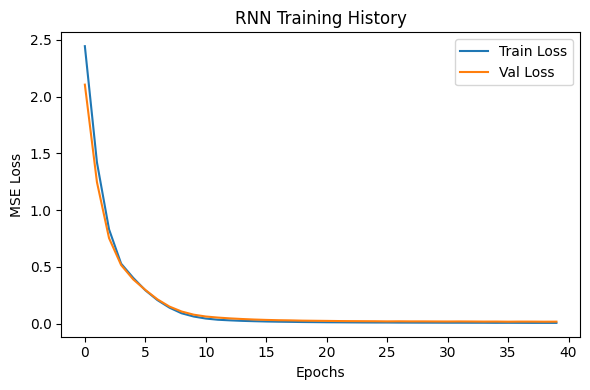

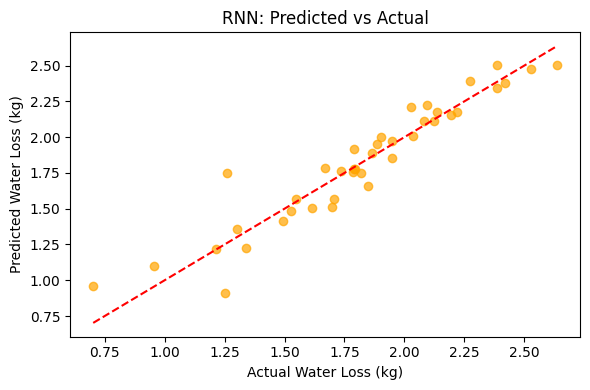


===== Model Comparison =====
               Model      RMSE       MAE        R2
0  Linear Regression  0.018046  0.013443  0.998143
1                RNN  0.135412  0.096656  0.895421


In [21]:

# ======================================================
# hydration_model_analysis.py
# Simplified, Explainable ML + RNN Water Loss Prediction
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# ===== Load Data =====
DATA_PATH = "formatted_hydration_data.csv"  # update path if needed
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

# ===== Select Columns =====
target_col = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

# Encode Gender (simple)
if df["Gender"].dtype == "object":
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"].astype(str))

# Drop NaNs simply
df = df[features + [target_col]].dropna()

X = df[features]
y = df[target_col]

# ===== Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Scale =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====================================================
# 💡 LINEAR REGRESSION (Explainable Model)
# ====================================================
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_lr = linreg.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n===== Linear Regression Summary =====")
print(f"RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")
print("\nCoefficients:")
for f, c in zip(features, linreg.coef_):
    print(f"{f:25s}: {c: .4f}")

# Plot: Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Water Loss (kg)")
plt.ylabel("Predicted Water Loss (kg)")
plt.title("Linear Regression: Predicted vs Actual")
plt.tight_layout()
plt.show()

# Feature importance visualization
coef_df = pd.DataFrame({"Feature": features, "Coefficient": linreg.coef_})
coef_df = coef_df.sort_values("Coefficient")
plt.figure(figsize=(7, 4))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()

# ====================================================
# ⚙️ SIMPLE RNN MODEL
# ====================================================
X_train_rnn = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn = np.expand_dims(X_test_scaled, axis=1)

rnn_model = models.Sequential([
    layers.SimpleRNN(64, activation='tanh', input_shape=(1, X_train_scaled.shape[1])),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_history = rnn_model.fit(
    X_train_rnn, y_train,
    validation_data=(X_test_rnn, y_test),
    epochs=40,
    batch_size=16,
    verbose=0
)

# Evaluate
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print("\n===== RNN Model Summary =====")
print(rnn_model.summary())
print(f"\nRMSE: {rmse_rnn:.4f}, MAE: {mae_rnn:.4f}, R²: {r2_rnn:.4f}")

# Plot loss curves
plt.figure(figsize=(6, 4))
plt.plot(rnn_history.history["loss"], label="Train Loss")
plt.plot(rnn_history.history["val_loss"], label="Val Loss")
plt.title("RNN Training History")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rnn, alpha=0.7, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Water Loss (kg)")
plt.ylabel("Predicted Water Loss (kg)")
plt.title("RNN: Predicted vs Actual")
plt.tight_layout()
plt.show()

# Compare models
compare = pd.DataFrame({
    "Model": ["Linear Regression", "RNN"],
    "RMSE": [rmse_lr, rmse_rnn],
    "MAE": [mae_lr, mae_rnn],
    "R2": [r2_lr, r2_rnn]
})
print("\n===== Model Comparison =====")
print(compare)


## RNN comparision

Loaded data: (200, 11)

🔹 Training BasicRNN ...
Epoch 1/30 - Loss: 2.5557
Epoch 2/30 - Loss: 0.9238
Epoch 3/30 - Loss: 0.1961
Epoch 4/30 - Loss: 0.1469
Epoch 5/30 - Loss: 0.0760
Epoch 6/30 - Loss: 0.0417
Epoch 7/30 - Loss: 0.0240
Epoch 8/30 - Loss: 0.0162
Epoch 9/30 - Loss: 0.0152
Epoch 10/30 - Loss: 0.0154
Epoch 11/30 - Loss: 0.0154
Epoch 12/30 - Loss: 0.0140
Epoch 13/30 - Loss: 0.0143
Epoch 14/30 - Loss: 0.0138
Epoch 15/30 - Loss: 0.0140
Epoch 16/30 - Loss: 0.0137
Epoch 17/30 - Loss: 0.0137
Epoch 18/30 - Loss: 0.0131
Epoch 19/30 - Loss: 0.0130
Epoch 20/30 - Loss: 0.0130
Epoch 21/30 - Loss: 0.0126
Epoch 22/30 - Loss: 0.0125
Epoch 23/30 - Loss: 0.0125
Epoch 24/30 - Loss: 0.0126
Epoch 25/30 - Loss: 0.0121
Epoch 26/30 - Loss: 0.0125
Epoch 27/30 - Loss: 0.0118
Epoch 28/30 - Loss: 0.0118
Epoch 29/30 - Loss: 0.0118
Epoch 30/30 - Loss: 0.0118
BasicRNN → RMSE: 0.0121, MAE: 0.0826, R²: 0.9309

🔹 Training DeepRNN ...
Epoch 1/30 - Loss: 2.1865
Epoch 2/30 - Loss: 0.3861
Epoch 3/30 - Loss: 0.1865


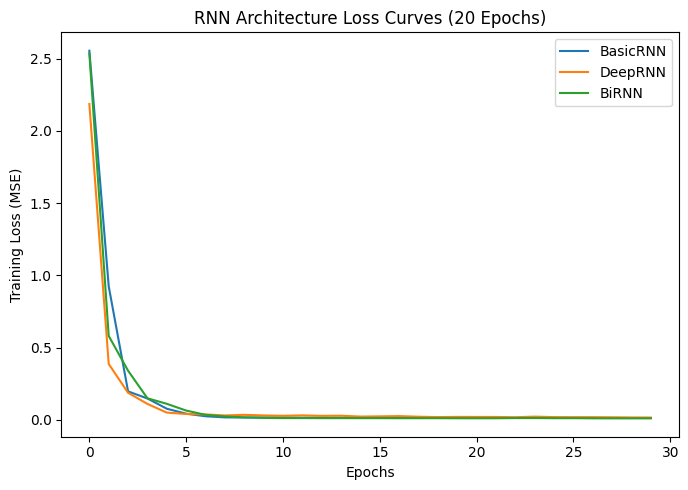

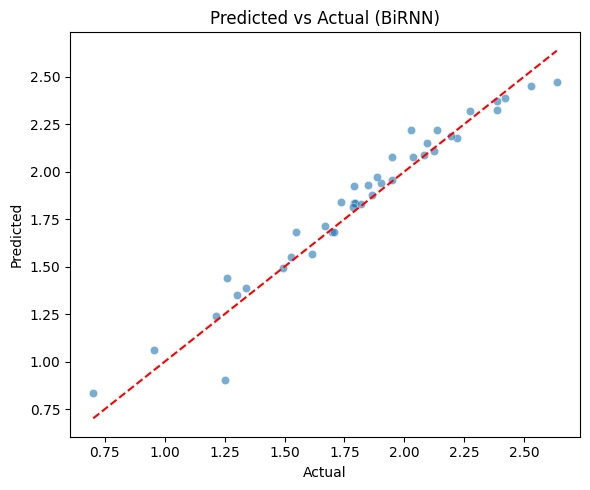

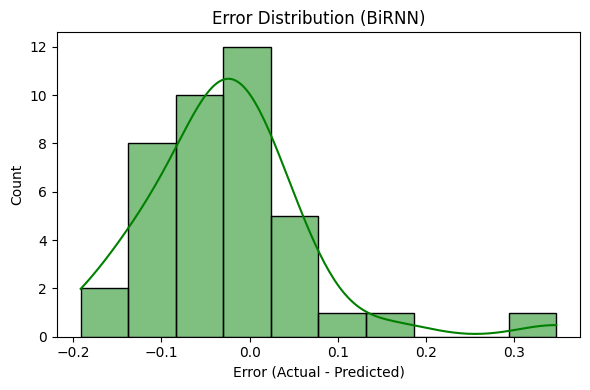

In [5]:
# hydration_rnn_variants_v1.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===================================================
# 1️⃣ Load and Prepare Data
# ===================================================
DATA_PATH = "formatted_hydration_data.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

target = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

X = df[features]
y = df[target].astype(float)

num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X.select_dtypes(include=["object", "category"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

input_dim = X_train_t.shape[1]
seq_len = 4
feat_per_step = input_dim // seq_len

X_train_seq = X_train_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)
X_test_seq = X_test_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=16, shuffle=True)

# ===================================================
# 2️⃣ RNN Architectures
# ===================================================
class BasicRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        return self.fc(h[-1])

class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=3):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        return self.fc(h[-1])

class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)  # concatenate forward + backward
        return self.fc(h_cat)

# ===================================================
# 3️⃣ Training Loop
# ===================================================
def train_model(model, loader, epochs=30, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        model.train()
        for xb, yb in loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
        print(f"Epoch {epoch+1}/{epochs} - Loss: {losses[-1]:.4f}")
    return losses

# ===================================================
# 4️⃣ Train All RNN Variants
# ===================================================
models = {
    "BasicRNN": BasicRNN(feat_per_step),
    "DeepRNN": DeepRNN(feat_per_step),
    "BiRNN": BiRNN(feat_per_step)
}

results = []
trained = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    losses = train_model(model, train_loader)
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_t).numpy().flatten()
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, mae, r2))
    trained[name] = (model, losses, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# ===================================================
# 5️⃣ Compare Results
# ===================================================
res_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
print("\n📊 Performance Summary:")
print(res_df)

best_model_name = res_df.iloc[0]["Model"]
print(f"\n🏆 Best RNN Variant: {best_model_name}")

# ===================================================
# 6️⃣ Visualization
# ===================================================
plt.figure(figsize=(7,5))
for name, (_, losses, _) in trained.items():
    plt.plot(losses, label=name)
plt.xlabel("Epochs")
plt.ylabel("Training Loss (MSE)")
plt.title("RNN Architecture Loss Curves (20 Epochs)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Predicted vs Actual for best model
best_pred = trained[best_model_name][2]
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.show()

# --- Error distribution
errors = y_test - best_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True, color='green')
plt.title(f"Error Distribution ({best_model_name})")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()


## more exploration

Loaded data: (200, 11)

🔹 Training BasicRNN ...
Epoch 1/20 - Loss: 2.6291
Epoch 2/20 - Loss: 1.0795
Epoch 3/20 - Loss: 0.2679
Epoch 4/20 - Loss: 0.2101
Epoch 5/20 - Loss: 0.1186
Epoch 6/20 - Loss: 0.0663
Epoch 7/20 - Loss: 0.0344
Epoch 8/20 - Loss: 0.0217
Epoch 9/20 - Loss: 0.0171
Epoch 10/20 - Loss: 0.0164
Epoch 11/20 - Loss: 0.0153
Epoch 12/20 - Loss: 0.0149
Epoch 13/20 - Loss: 0.0145
Epoch 14/20 - Loss: 0.0147
Epoch 15/20 - Loss: 0.0141
Epoch 16/20 - Loss: 0.0142
Epoch 17/20 - Loss: 0.0136
Epoch 18/20 - Loss: 0.0140
Epoch 19/20 - Loss: 0.0135
Epoch 20/20 - Loss: 0.0133
BasicRNN → RMSE: 0.0124, MAE: 0.0867, R²: 0.9295

🔹 Training DeepRNN ...
Epoch 1/20 - Loss: 2.0717
Epoch 2/20 - Loss: 0.3474
Epoch 3/20 - Loss: 0.2366
Epoch 4/20 - Loss: 0.1679
Epoch 5/20 - Loss: 0.0816
Epoch 6/20 - Loss: 0.0498
Epoch 7/20 - Loss: 0.0460
Epoch 8/20 - Loss: 0.0337
Epoch 9/20 - Loss: 0.0433
Epoch 10/20 - Loss: 0.0323
Epoch 11/20 - Loss: 0.0282
Epoch 12/20 - Loss: 0.0316
Epoch 13/20 - Loss: 0.0331
Epoch 

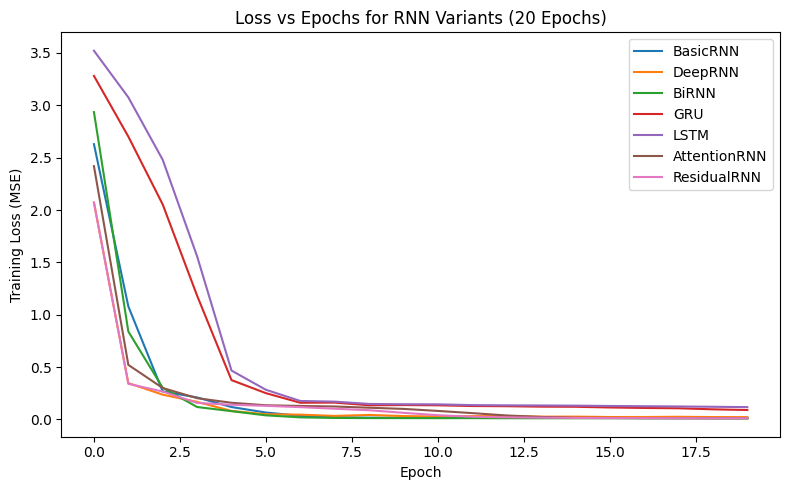

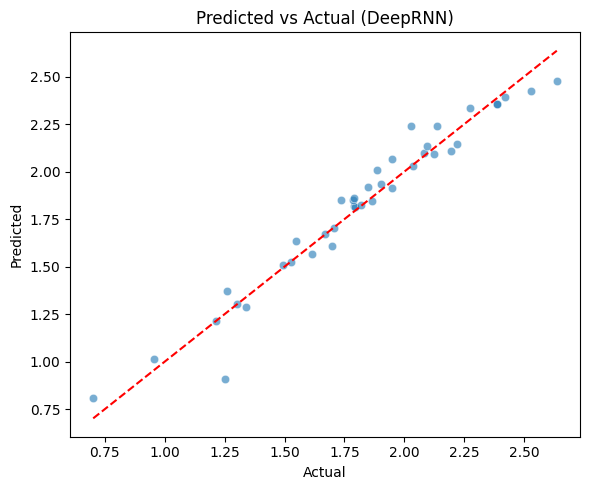

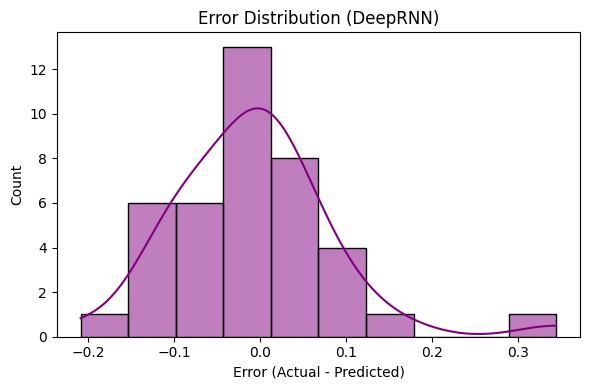

In [7]:
# hydration_rnn_exploration_v2.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===================================================
# 1️⃣ Load and Prepare Data
# ===================================================
DATA_PATH = "formatted_hydration_data.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded data:", df.shape)

if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

target = "TARGET_True_Water_Loss_kg"
features = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

X = df[features]
y = df[target].astype(float)

num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X.select_dtypes(include=["object", "category"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

input_dim = X_train_t.shape[1]
seq_len = 4
feat_per_step = input_dim // seq_len

X_train_seq = X_train_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)
X_test_seq = X_test_t[:, :feat_per_step * seq_len].reshape(-1, seq_len, feat_per_step)

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=16, shuffle=True)

# ===================================================
# 2️⃣ Model Definitions
# ===================================================

class BasicRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        return self.fc(h[-1])

class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=3):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        return self.fc(h[-1])

class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)
    def forward(self, x):
        _, h = self.rnn(x)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)
        return self.fc(h_cat)

class GRURegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, h = self.gru(x)
        return self.fc(h[-1])

class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class AttentionRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.attn = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=4, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.rnn(x)
        attn_out, _ = self.attn(out, out, out)
        pooled = attn_out.mean(dim=1)
        return self.fc(pooled)

class ResidualRNN(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.rnn1 = nn.RNN(input_size, hidden_size, batch_first=True)
        self.rnn2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out1, _ = self.rnn1(x)
        out2, _ = self.rnn2(out1)
        out = out1 + out2  # residual connection
        pooled = out.mean(dim=1)
        return self.fc(pooled)

# ===================================================
# 3️⃣ Training Function
# ===================================================
def train_model(model, loader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        model.train()
        for xb, yb in loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
        print(f"Epoch {epoch+1}/{epochs} - Loss: {losses[-1]:.4f}")
    return losses

# ===================================================
# 4️⃣ Train All Models
# ===================================================
models = {
    "BasicRNN": BasicRNN(feat_per_step),
    "DeepRNN": DeepRNN(feat_per_step),
    "BiRNN": BiRNN(feat_per_step),
    "GRU": GRURegressor(feat_per_step),
    "LSTM": LSTMRegressor(feat_per_step),
    "AttentionRNN": AttentionRNN(feat_per_step),
    "ResidualRNN": ResidualRNN(feat_per_step)
}

results = []
trained = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    losses = train_model(model, train_loader, epochs=20)
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_t).numpy().flatten()
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, mae, r2))
    trained[name] = (model, losses, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# ===================================================
# 5️⃣ Results Summary
# ===================================================
res_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
print("\n📊 Performance Summary:")
print(res_df)

best_model_name = res_df.iloc[0]["Model"]
print(f"\n🏆 Best Performing Model: {best_model_name}")

# ===================================================
# 6️⃣ Visualization
# ===================================================
plt.figure(figsize=(8,5))
for name, (_, losses, _) in trained.items():
    plt.plot(losses, label=name)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Loss vs Epochs for RNN Variants (20 Epochs)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Predicted vs Actual (Best Model)
best_pred = trained[best_model_name][2]
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.show()

# --- Error Distribution
errors = y_test - best_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True, color='purple')
plt.title(f"Error Distribution ({best_model_name})")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()


## Final Model

Loaded CSV: formatted_hydration_data.csv shape: (200, 11)
Preprocessed feature matrix shape: (200, 9)
Padded 3 zero columns. New n_features: 12
Sequence input shape: (200, 4, 3) (samples, seq_len, feat_per_step)
Train/Val/Test sizes: 136 24 40

=== DeepRNN ===
DeepRNN(
  (rnn): RNN(3, 128, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)
Trainable params: 91393
Epoch 01/20 | Train Loss: 1.575241 | Val Loss: 0.559123 | Val RMSE: 0.559123 | Val MAE: 0.616273 | Val R2: -0.8490
Epoch 02/20 | Train Loss: 0.377085 | Val Loss: 0.314246 | Val RMSE: 0.314246 | Val MAE: 0.469198 | Val R2: -0.0392
Epoch 03/20 | Train Loss: 0.231452 | Val Loss: 0.248268 | Val RMSE: 0.248268 | Val MAE: 0.422144 | Val R2: 0.1790
Epoch 04/20 | Train Loss: 0.180969 | Val Loss: 0.161321 | Val RMSE: 0.161321 | Val MAE: 0.335598 | Val R2: 0.4665
Epoch 05/20 | Train 

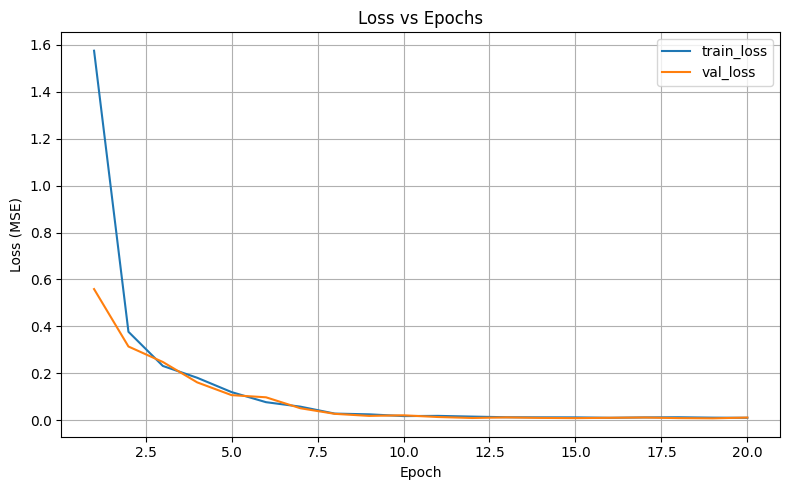

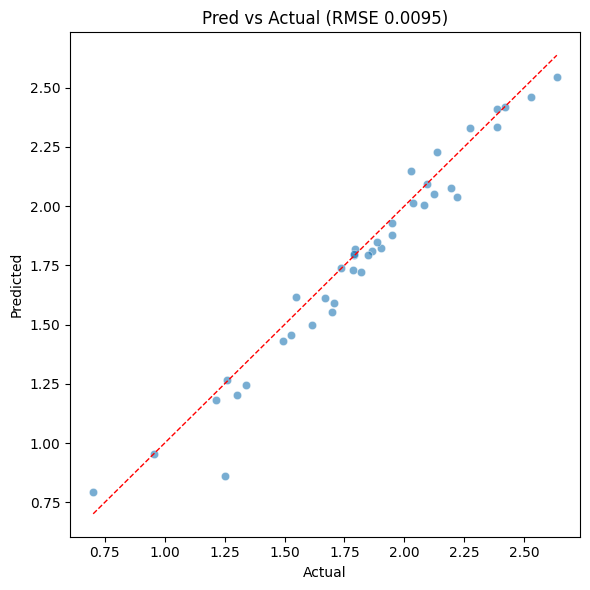

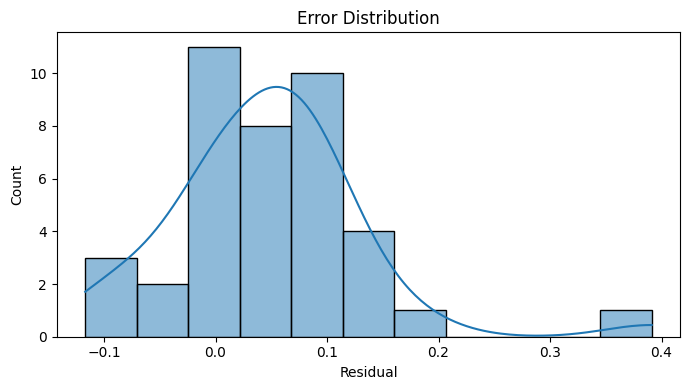

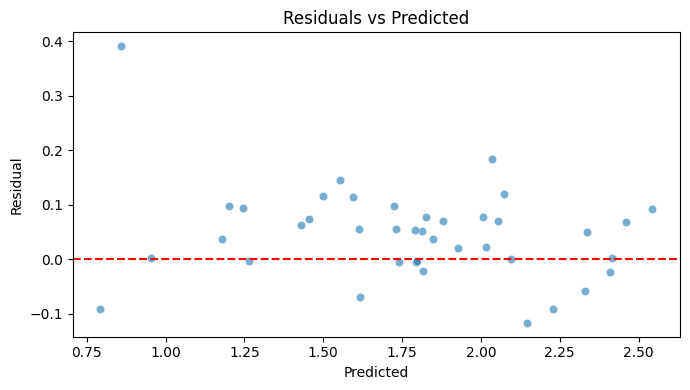

Done. Artifacts in: deeprnn_artifacts


In [15]:
# deeprnn_final_fixed.py
import os, random, pickle
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional nice model summary
try:
    from torchinfo import summary as torch_summary
    TORCHINFO_AVAILABLE = True
except Exception:
    TORCHINFO_AVAILABLE = False

# -----------------------------
# Config / Hyperparameters
# -----------------------------
SEED = 42
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_PATH = "formatted_hydration_data.csv"
MODEL_DIR = Path("deeprnn_artifacts")
MODEL_DIR.mkdir(exist_ok=True)
MODEL_SAVE_PATH = MODEL_DIR / "deep_rnn_state_dict.pt"
PIPE_SAVE_PATH = MODEL_DIR / "preprocessor.pkl"
METRICS_SAVE_PATH = MODEL_DIR / "metrics_table.csv"
PLOTS_DIR = MODEL_DIR / "plots"
PLOTS_DIR.mkdir(exist_ok=True)

SEQ_LEN = 4
HIDDEN_SIZE = 128
NUM_LAYERS = 3
DROPOUT = 0.3
BATCH_SIZE = 16
LR = 1e-3
EPOCHS = 20
VALIDATION_SPLIT = 0.15
RANDOM_SEED = SEED

def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

seed_everything(RANDOM_SEED)

# -----------------------------
# 1. Load + Preprocess Data
# -----------------------------
df = pd.read_csv(DATA_PATH)
print("Loaded CSV:", DATA_PATH, "shape:", df.shape)

if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

TARGET = "TARGET_True_Water_Loss_kg"
FEATURES = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

assert TARGET in df.columns, f"Target column '{TARGET}' not found."
X_raw = df[FEATURES].copy()
y = df[TARGET].astype(float).values

num_feats = X_raw.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = [c for c in X_raw.columns if c not in num_feats]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
])

X_proc = preprocessor.fit_transform(X_raw)  # numpy array
print("Preprocessed feature matrix shape:", X_proc.shape)

# Make feature count divisible by SEQ_LEN by padding zeros if needed
n_features = X_proc.shape[1]
remainder = n_features % SEQ_LEN
if remainder != 0:
    pad_cols = SEQ_LEN - remainder
    X_proc = np.concatenate([X_proc, np.zeros((X_proc.shape[0], pad_cols))], axis=1)
    n_features = X_proc.shape[1]
    print(f"Padded {pad_cols} zero columns. New n_features: {n_features}")

feat_per_step = n_features // SEQ_LEN
if feat_per_step <= 0:
    raise ValueError("Too few features per step; reduce SEQ_LEN or add features.")

X_seq = X_proc.reshape(-1, SEQ_LEN, feat_per_step)
print("Sequence input shape:", X_seq.shape, "(samples, seq_len, feat_per_step)")

# -----------------------------
# Train/Val/Test split (sklearn)
# -----------------------------
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X_seq, y, test_size=0.2, random_state=RANDOM_SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, test_size=VALIDATION_SPLIT, random_state=RANDOM_SEED
)

print("Train/Val/Test sizes:", X_train.shape[0], X_val.shape[0], X_test.shape[0])

# Convert to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE, shuffle=False)

# -----------------------------
# Define DeepRNN
# -----------------------------
class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, dropout=DROPOUT):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, x):
        out, h_n = self.rnn(x)
        last_hidden = h_n[-1]
        return self.fc(last_hidden)

input_size = feat_per_step
model = DeepRNN(input_size=input_size).to(DEVICE)
print("\n=== DeepRNN ===")
print(model)
print("Trainable params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

if TORCHINFO_AVAILABLE:
    try:
        torch_summary(model, input_size=(1, SEQ_LEN, input_size))
    except Exception as e:
        print("torchinfo summary failed:", e)

# -----------------------------
# Training / Evaluation utils
# -----------------------------
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device); yb = yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
        n += xb.size(0)
    return running_loss / n

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    preds_all = []
    ys_all = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device); yb = yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            running_loss += loss.item() * xb.size(0)
            preds_all.append(preds.cpu().numpy())
            ys_all.append(yb.cpu().numpy())
    preds_all = np.vstack(preds_all).flatten()
    ys_all = np.vstack(ys_all).flatten()
    avg_loss = running_loss / len(ys_all)
    rmse = mean_squared_error(ys_all, preds_all)
    mae = mean_absolute_error(ys_all, preds_all)
    r2 = r2_score(ys_all, preds_all)
    return avg_loss, preds_all, ys_all, rmse, mae, r2

# -----------------------------
# Train loop
# -----------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

train_losses, val_losses, val_rmses = [], [], []
best_val_rmse = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
    val_loss, _, _, val_rmse, val_mae, val_r2 = evaluate(model, val_loader, criterion, DEVICE)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_rmses.append(val_rmse)

    print(f"Epoch {epoch:02d}/{EPOCHS} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | Val RMSE: {val_rmse:.6f} | Val MAE: {val_mae:.6f} | Val R2: {val_r2:.4f}")

    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        best_state = {
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "epoch": epoch,
            "val_rmse": val_rmse
        }

if best_state is not None:
    model.load_state_dict(best_state["model_state_dict"])
    print(f"Loaded best model from epoch {best_state['epoch']} (val RMSE {best_state['val_rmse']:.6f})")

# -----------------------------
# Final test evaluation
# -----------------------------
test_loss, preds_test, ys_test, test_rmse, test_mae, test_r2 = evaluate(model, test_loader, criterion, DEVICE)
print("\n=== Test Performance ===")
print(f"RMSE: {test_rmse:.6f} | MAE: {test_mae:.6f} | R2: {test_r2:.4f}")

# Save artifacts
pd.DataFrame({"epoch": list(range(1, EPOCHS+1)), "train_loss": train_losses, "val_loss": val_losses}).to_csv(METRICS_SAVE_PATH, index=False)
torch.save({
    "model_state_dict": model.state_dict(),
    "model_config": {"hidden_size": HIDDEN_SIZE, "num_layers": NUM_LAYERS, "dropout": DROPOUT, "input_size": input_size},
    "feat_per_step": feat_per_step,
    "seq_len": SEQ_LEN
}, MODEL_SAVE_PATH)
with open(PIPE_SAVE_PATH, "wb") as f:
    pickle.dump(preprocessor, f)
print("Saved model and preprocessor to", MODEL_DIR)

# -----------------------------
# Visualizations
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), train_losses, label="train_loss")
plt.plot(range(1, EPOCHS+1), val_losses, label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("Loss (MSE)"); plt.title("Loss vs Epochs"); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.savefig(PLOTS_DIR / "loss_vs_epochs.png"); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=ys_test, y=preds_test, alpha=0.6)
lims = [min(ys_test.min(), preds_test.min()), max(ys_test.max(), preds_test.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title(f"Pred vs Actual (RMSE {test_rmse:.4f})")
plt.tight_layout(); plt.savefig(PLOTS_DIR / "pred_vs_actual_test.png"); plt.show()

errors = ys_test - preds_test
plt.figure(figsize=(7,4)); sns.histplot(errors, kde=True); plt.xlabel("Residual"); plt.title("Error Distribution"); plt.tight_layout(); plt.savefig(PLOTS_DIR / "error_dist.png"); plt.show()

plt.figure(figsize=(7,4)); sns.scatterplot(x=preds_test, y=errors, alpha=0.6); plt.axhline(0, linestyle='--', color='r')
plt.xlabel("Predicted"); plt.ylabel("Residual"); plt.title("Residuals vs Predicted"); plt.tight_layout(); plt.savefig(PLOTS_DIR / "res_vs_pred.png"); plt.show()

# Save final metrics table
pd.DataFrame([{"metric":"RMSE","value":test_rmse},{"metric":"MAE","value":test_mae},{"metric":"R2","value":test_r2}]).to_csv(MODEL_DIR / "test_metrics_table.csv", index=False)

# -----------------------------
# Loader + inference helper
# -----------------------------
def load_deeprnn_for_inference(model_path: str, preprocessor_path: str, device=None):
    device = device or (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    ckpt = torch.load(model_path, map_location=device)
    cfg = ckpt["model_config"]
    model = DeepRNN(input_size=cfg["input_size"], hidden_size=cfg["hidden_size"], num_layers=cfg["num_layers"], dropout=cfg["dropout"])
    model.load_state_dict(ckpt["model_state_dict"])
    model.to(device); model.eval()
    preproc = pickle.load(open(preprocessor_path, "rb"))
    feat_per_step_local = ckpt["feat_per_step"]
    seq_len_local = ckpt["seq_len"]
    return model, preproc, feat_per_step_local, seq_len_local, device

def predict_from_raw(df_input: pd.DataFrame, model, preproc, feat_per_step_local, seq_len_local, device=None):
    device = device or (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    Xpr = preproc.transform(df_input[FEATURES])
    needed = feat_per_step_local * seq_len_local
    if Xpr.shape[1] < needed:
        pad_cols = needed - Xpr.shape[1]
        Xpr = np.concatenate([Xpr, np.zeros((Xpr.shape[0], pad_cols))], axis=1)
    Xseq = Xpr.reshape(-1, seq_len_local, feat_per_step_local)
    Xt = torch.tensor(Xseq, dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(Xt).cpu().numpy().flatten()
    return preds

print("Done. Artifacts in:", MODEL_DIR)


## inference

Using device: cpu
Loaded checkpoint keys: ['model_state_dict', 'model_config', 'feat_per_step', 'seq_len']
Loaded preprocessor from: deeprnn_artifacts/preprocessor.pkl
Model loaded: DeepRNN(input_size=3, hidden=128, layers=3, dropout=0.3)
Loaded CSV: formatted_hydration_data.csv shape: (200, 11)
Padded 3 columns to make divisible by SEQ_LEN. New n_features: 12
Sequence shape: (200, 4, 3)

=== Test set inference results ===
Test samples: 40
RMSE: 0.097317
MAE : 0.070725
R2  : 0.9460
Saved predictions to: deeprnn_artifacts/test_predictions.csv

First 20 predictions (actual, predicted, residual):
     actual  predicted  residual
idx                             
0    2.4193     2.4173    0.0020
1    1.9023     1.8251    0.0772
2    2.2730     2.3311   -0.0581
3    1.4920     1.4297    0.0623
4    2.0290     2.1459   -0.1169
5    1.3007     1.2024    0.0983
6    2.6360     2.5439    0.0921
7    2.1233     2.0529    0.0704
8    1.7907     1.7956   -0.0049
9    2.5300     2.4613    0.0687
10 

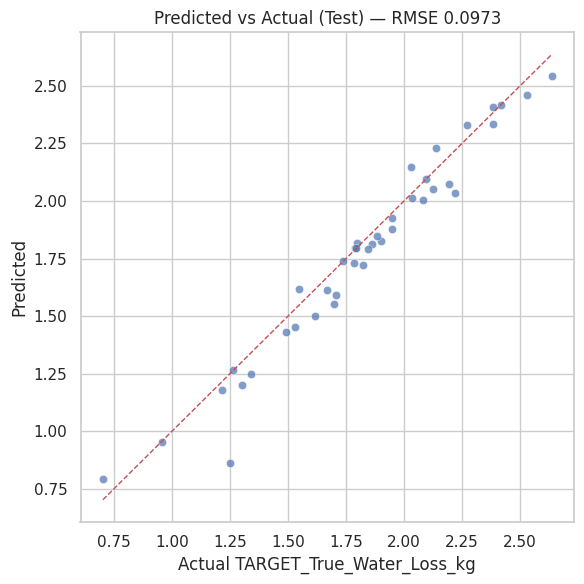

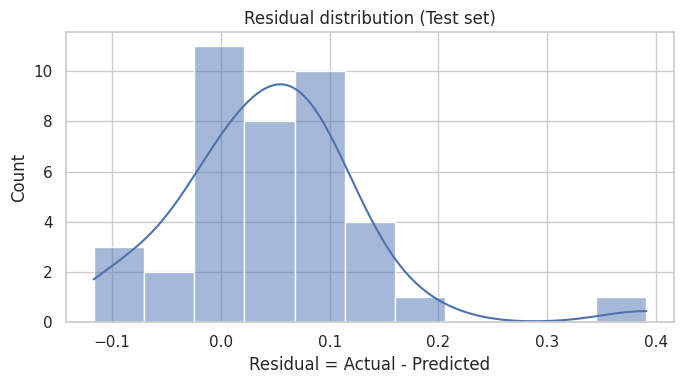

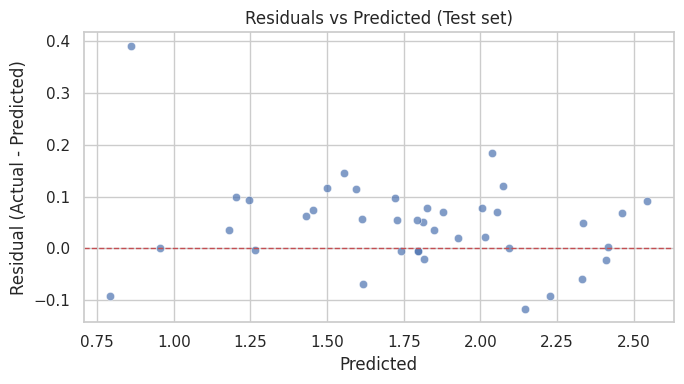


Residual summary:
mean      0.046291
std       0.086693
median    0.052679
min      -0.116898
max       0.391149
Saved detailed predictions (with residuals) to: deeprnn_artifacts/test_predictions_with_residuals.csv

Inference + visualization complete. Plots saved to: deeprnn_artifacts/inference_plots


In [16]:
# deeprnn_inference.py
"""
Load saved DeepRNN + preprocessor, run inference on test split,
compute metrics and visualize residuals.

Requires:
  - deeprnn_artifacts/deep_rnn_state_dict.pt
  - deeprnn_artifacts/preprocessor.pkl
  - formatted_hydration_data.csv
"""

import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# -----------------------
# Config / paths
# -----------------------
MODEL_DIR = Path("deeprnn_artifacts")
MODEL_CHECKPOINT = MODEL_DIR / "deep_rnn_state_dict.pt"
PREPROC_PATH = MODEL_DIR / "preprocessor.pkl"
CSV_PATH = "formatted_hydration_data.csv"
PLOTS_DIR = MODEL_DIR / "inference_plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
SAVE_PRED_CSV = MODEL_DIR / "test_predictions.csv"

SEED = 42
SEQ_LEN = None         # will be loaded from ckpt if present; else default 4

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", DEVICE)

# -----------------------
# Define model class (must match training definition)
# -----------------------
class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=3, dropout=0.3):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, x):
        out, h_n = self.rnn(x)
        last_hidden = h_n[-1]
        return self.fc(last_hidden)

# -----------------------
# Load checkpoint & preprocessor
# -----------------------
if not MODEL_CHECKPOINT.exists():
    raise FileNotFoundError(f"Checkpoint not found at {MODEL_CHECKPOINT}")

ckpt = torch.load(MODEL_CHECKPOINT, map_location=DEVICE)
print("Loaded checkpoint keys:", list(ckpt.keys()))

# load preprocessor
with open(PREPROC_PATH, "rb") as f:
    preprocessor = pickle.load(f)
print("Loaded preprocessor from:", PREPROC_PATH)

# extract saved config (if present)
cfg = ckpt.get("model_config", None)
feat_per_step = ckpt.get("feat_per_step", None)
seq_len = ckpt.get("seq_len", None)
if seq_len is not None:
    SEQ_LEN = seq_len
else:
    SEQ_LEN = 4  # fallback

if cfg is None or feat_per_step is None:
    raise ValueError("Checkpoint missing model_config or feat_per_step. Can't reconstruct input shape.")

input_size = cfg["input_size"]
hidden_size = cfg.get("hidden_size", 128)
num_layers = cfg.get("num_layers", 3)
dropout = cfg.get("dropout", 0.3)

# rebuild model
model = DeepRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
model.load_state_dict(ckpt["model_state_dict"])
model.to(DEVICE)
model.eval()
print(f"Model loaded: DeepRNN(input_size={input_size}, hidden={hidden_size}, layers={num_layers}, dropout={dropout})")

# -----------------------
# Load CSV & build sequences (same preprocessing as training)
# -----------------------
df = pd.read_csv(CSV_PATH)
print("Loaded CSV:", CSV_PATH, "shape:", df.shape)

# Drop Final_Weight_kg if present (training did)
if "Final_Weight_kg" in df.columns:
    df = df.drop(columns=["Final_Weight_kg"])

TARGET = "TARGET_True_Water_Loss_kg"
FEATURES = [
    "Gender", "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
]

assert TARGET in df.columns, f"Target '{TARGET}' not found"

# Apply preprocessor (must use transform, not fit_transform)
X_proc = preprocessor.transform(df[FEATURES])
n_features = X_proc.shape[1]
remainder = n_features % SEQ_LEN
if remainder != 0:
    pad_cols = SEQ_LEN - remainder
    X_proc = np.concatenate([X_proc, np.zeros((X_proc.shape[0], pad_cols))], axis=1)
    n_features = X_proc.shape[1]
    print(f"Padded {pad_cols} columns to make divisible by SEQ_LEN. New n_features: {n_features}")

# Ensure feat_per_step matches saved value
feat_per_step_current = n_features // SEQ_LEN
if feat_per_step_current != feat_per_step:
    print("Warning: computed feat_per_step differs from checkpoint value.")
    print(" checkpoint feat_per_step:", feat_per_step, "computed:", feat_per_step_current)
    # We'll use the checkpoint feat_per_step to reshape (this follows training logic)
    feat_per_step = feat_per_step_current

# reshape into sequences
X_seq = X_proc[:, :feat_per_step * SEQ_LEN].reshape(-1, SEQ_LEN, feat_per_step)
y = df[TARGET].astype(float).values
print("Sequence shape:", X_seq.shape)

# -----------------------
# Reproduce same train/test split and run inference on test set
# -----------------------
# use same random_state & test_size as training script (0.2)
X_train_all, X_test, y_train_all, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=SEED)

# convert X_test to torch tensor
X_test_t = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)

# -----------------------
# Inference
# -----------------------
with torch.no_grad():
    preds_torch = model(X_test_t).cpu().numpy().flatten()

# Metrics (numpy)
y_true = np.array(y_test).flatten()
y_pred = preds_torch.flatten()

mse = np.mean((y_true - y_pred) ** 2)
rmse = float(np.sqrt(mse))
mae = float(np.mean(np.abs(y_true - y_pred)))
r2 = float(r2_score(y_true, y_pred))

print("\n=== Test set inference results ===")
print(f"Test samples: {len(y_true)}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE : {mae:.6f}")
print(f"R2  : {r2:.4f}")

# Save predictions table
pred_df = pd.DataFrame({
    "actual": y_true,
    "predicted": y_pred,
    "residual": (y_true - y_pred)
})
pred_df.index.name = "idx"
pred_df.to_csv(SAVE_PRED_CSV, index=True)
print("Saved predictions to:", SAVE_PRED_CSV)

# -----------------------
# Show top N rows for quick inspection
# -----------------------
N = min(20, len(pred_df))
print("\nFirst", N, "predictions (actual, predicted, residual):")
print(pred_df.head(N).to_string(index=True, float_format="{:.4f}".format))

# -----------------------
# Visualizations
# -----------------------
sns.set(style="whitegrid")

# 1) Predicted vs Actual scatter
plt.figure(figsize=(6,6))
sns.scatterplot(x=pred_df["actual"], y=pred_df["predicted"], alpha=0.7)
lims = [min(pred_df["actual"].min(), pred_df["predicted"].min()),
        max(pred_df["actual"].max(), pred_df["predicted"].max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual TARGET_True_Water_Loss_kg")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (Test) — RMSE {rmse:.4f}")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "pred_vs_actual_test.png", dpi=200)
plt.show()

# 2) Residual histogram
plt.figure(figsize=(7,4))
sns.histplot(pred_df["residual"], kde=True)
plt.xlabel("Residual = Actual - Predicted")
plt.title("Residual distribution (Test set)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "residual_hist_test.png", dpi=200)
plt.show()

# 3) Residuals vs Predicted
plt.figure(figsize=(7,4))
sns.scatterplot(x=pred_df["predicted"], y=pred_df["residual"], alpha=0.7)
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted (Test set)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "residuals_vs_pred_test.png", dpi=200)
plt.show()

# 4) Residuals summary stats
res_stats = pred_df["residual"].agg(["mean", "std", "median", "min", "max"])
print("\nResidual summary:")
print(res_stats.to_string())

# -----------------------
# Optional: save residuals table
# -----------------------
pred_df.to_csv(MODEL_DIR / "test_predictions_with_residuals.csv", index=True)
print("Saved detailed predictions (with residuals) to:", MODEL_DIR / "test_predictions_with_residuals.csv")

print("\nInference + visualization complete. Plots saved to:", PLOTS_DIR)


In [17]:
# stdin_infer.py
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

MODEL_DIR = Path("deeprnn_artifacts")
MODEL_CHECKPOINT = MODEL_DIR / "deep_rnn_state_dict.pt"
PREPROC_PATH = MODEL_DIR / "preprocessor.pkl"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# make sure these match training FEATURES order
FEATURES = [
    "Gender",
    "Age",
    "Initial_Weight_kg",
    "Total_Water_Consumed_ml",
    "Final_Gear1_Sweat_kg",
    "Final_Salt_Lost_1",
    "Final_Gear2_Sweat_kg",
    "Final_Salt_Lost_2"
]

# Define model class exactly as used during training
class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=3, dropout=0.3):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, x):
        out, h_n = self.rnn(x)
        last_hidden = h_n[-1]
        return self.fc(last_hidden)

def load_model_and_preproc(model_path=MODEL_CHECKPOINT, preproc_path=PREPROC_PATH, device=DEVICE):
    if not model_path.exists():
        raise FileNotFoundError(f"Model checkpoint not found: {model_path}")
    if not preproc_path.exists():
        raise FileNotFoundError(f"Preprocessor not found: {preproc_path}")

    ckpt = torch.load(model_path, map_location=device)
    cfg = ckpt.get("model_config", {})
    input_size = cfg.get("input_size")
    hidden_size = cfg.get("hidden_size", 128)
    num_layers = cfg.get("num_layers", 3)
    dropout = cfg.get("dropout", 0.3)
    feat_per_step = ckpt.get("feat_per_step", None)
    seq_len = ckpt.get("seq_len", None) or 4

    model = DeepRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
    model.load_state_dict(ckpt["model_state_dict"])
    model.to(device)
    model.eval()

    with open(preproc_path, "rb") as f:
        preproc = pickle.load(f)

    return model, preproc, int(feat_per_step), int(seq_len), device

def read_features_from_stdin():
    """
    Prompts user for values for each feature in FEATURES.
    For numeric features enter a number (or blank to use NaN -> imputed).
    For categorical features (Gender) enter a string token.
    """
    print("Enter feature values. To leave a numeric value missing, press Enter (will be treated as NaN and imputed).")
    vals = {}
    # define numeric vs categorical here
    numeric_feats = set([
        "Age", "Initial_Weight_kg", "Total_Water_Consumed_ml",
        "Final_Gear1_Sweat_kg", "Final_Salt_Lost_1",
        "Final_Gear2_Sweat_kg", "Final_Salt_Lost_2"
    ])
    for feat in FEATURES:
        raw = input(f"  {feat}: ").strip()
        if raw == "":
            # blank -> NaN for numeric, empty string for categorical
            if feat in numeric_feats:
                vals[feat] = np.nan
            else:
                vals[feat] = ""  # let imputer/encoder handle it
        else:
            if feat in numeric_feats:
                try:
                    vals[feat] = float(raw)
                except ValueError:
                    print(f"  Warning: couldn't parse '{raw}' as float for {feat}. Using NaN.")
                    vals[feat] = np.nan
            else:
                vals[feat] = raw
    # create single-row DataFrame
    df = pd.DataFrame([vals], columns=FEATURES)
    return df

def preprocess_and_predict(df_input: pd.DataFrame, model, preproc, feat_per_step, seq_len, device=DEVICE):
    # transform with preprocessor
    Xpr = preproc.transform(df_input[FEATURES])
    # ensure divisible and pad zeros if needed
    n_features = Xpr.shape[1]
    needed = feat_per_step * seq_len
    if n_features < needed:
        pad_cols = needed - n_features
        Xpr = np.concatenate([Xpr, np.zeros((Xpr.shape[0], pad_cols))], axis=1)
    elif n_features > needed:
        # trim extra columns (training used [:feat_per_step*seq_len])
        Xpr = Xpr[:, :needed]

    Xseq = Xpr.reshape(-1, seq_len, feat_per_step)
    Xt = torch.tensor(Xseq, dtype=torch.float32).to(device)
    with torch.no_grad():
        pred = model(Xt).cpu().numpy().flatten()[0]
    return float(pred)

def main():
    model, preproc, feat_per_step, seq_len, device = load_model_and_preproc()
    print(f"Loaded model (feat_per_step={feat_per_step}, seq_len={seq_len}) on device={device}\n")
    df_input = read_features_from_stdin()
    try:
        pred = preprocess_and_predict(df_input, model, preproc, feat_per_step, seq_len, device)
        print(f"\nPredicted TARGET_True_Water_Loss_kg = {pred:.6f}")
    except Exception as e:
        print("Error during prediction:", e)

if __name__ == "__main__":
    main()


Loaded model (feat_per_step=3, seq_len=4) on device=cpu

Enter feature values. To leave a numeric value missing, press Enter (will be treated as NaN and imputed).
  Gender: male
  Age: 20
  Initial_Weight_kg: 34
  Total_Water_Consumed_ml: 350
  Final_Gear1_Sweat_kg: 120
  Final_Salt_Lost_1: 110
  Final_Gear2_Sweat_kg: 100
  Final_Salt_Lost_2: 150

Predicted TARGET_True_Water_Loss_kg = 1.690395


In [19]:
!zip -r deeprnn_artifacts.zip deeprnn_artifacts

  adding: deeprnn_artifacts/ (stored 0%)
  adding: deeprnn_artifacts/test_metrics_table.csv (deflated 7%)
  adding: deeprnn_artifacts/inference_plots/ (stored 0%)
  adding: deeprnn_artifacts/inference_plots/residual_hist_test.png (deflated 11%)
  adding: deeprnn_artifacts/inference_plots/pred_vs_actual_test.png (deflated 13%)
  adding: deeprnn_artifacts/inference_plots/residuals_vs_pred_test.png (deflated 16%)
  adding: deeprnn_artifacts/deep_rnn_state_dict.pt (deflated 9%)
  adding: deeprnn_artifacts/plots/ (stored 0%)
  adding: deeprnn_artifacts/plots/error_dist.png (deflated 7%)
  adding: deeprnn_artifacts/plots/loss_vs_epochs.png (deflated 11%)
  adding: deeprnn_artifacts/plots/pred_vs_actual_test.png (deflated 9%)
  adding: deeprnn_artifacts/plots/res_vs_pred.png (deflated 12%)
  adding: deeprnn_artifacts/preprocessor.pkl (deflated 43%)
  adding: deeprnn_artifacts/test_predictions_with_residuals.csv (deflated 50%)
  adding: deeprnn_artifacts/test_predictions.csv (deflated 50%)
  a